# by changing kernal we get different filters

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd

In [ ]:
#for applying filter we need 2D array
car=cv2.imread("/content/drive/MyDrive/SAMPLE_DATA/car.png",0)
car=cv2.resize(car,(528,339))

In [ ]:
#for applying filter we need 2D array
face=cv2.imread("/content/drive/MyDrive/SAMPLE_DATA/face.jpg",0)


In [ ]:
car

array([[104, 116, 133, ...,  44,  43,  42],
       [118, 128, 145, ...,  44,  43,  42],
       [129, 140, 156, ...,  43,  43,  42],
       ...,
       [ 59,  59,  60, ...,  58,  56,  55],
       [ 61,  62,  63, ...,  56,  56,  55],
       [ 63,  64,  65, ...,  55,  55,  54]], dtype=uint8)

In [ ]:
car[0,1]

array([ 37, 106, 166], dtype=uint8)

In [ ]:
A=np.array([1 ,1 ,1]).reshape(3,1)
B=np.array([1,0,-1]).reshape(1,3)
print(A,B)

[[1]
 [1]
 [1]] [[ 1  0 -1]]


In [ ]:
gx=np.dot(A,B)

In [ ]:
gx

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

1

In [ ]:
gy=np.dot(B.T,A.T)

In [ ]:
gy

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [ ]:
s1=np.sum(np.multiply(gx,car[0:3,0:3]))

In [ ]:
sum(sum(np.multiply(gx,car[0:3,0:3])))

array([  513,     0, -2172])

(339, 528)


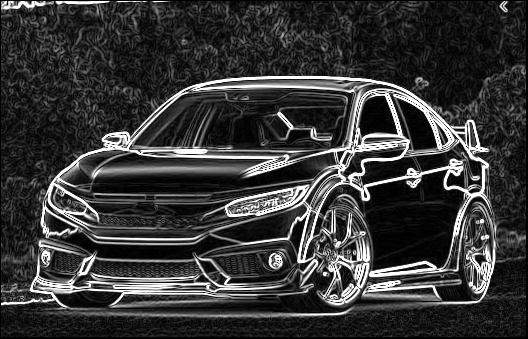

In [ ]:
# 1
def sob_edg_det(a):
    # first of all we need 2D array or we say GRAYSCALE IMAGE
    # WE CAN USE np.mean(a,axis=2) but it does not give correct perception of colour.
    # green seems 10 times more bright than other colour
    # so there is non linear relation b/w bgr to find the gray picture.
    gray=a

    print(gray.shape)
    #image with edge detected
    edged_img=np.empty(gray.shape)

    #defining kernel gx and gy
    A=np.array([1 ,2 ,1]).reshape(3,1)
    B=np.array([1,0,-1]).reshape(1,3)
    #defining kernel gx
    gx=np.dot(A,B)
    #defining kernel gy
         # One kernel is simply the other rotated by 90°
    gy=np.dot(B.T,A.T)
    for i in range(0,gray.shape[0]-3):
        for j in range(0,gray.shape[1]-3):
            s1=np.sum(np.multiply(gx,gray[i:i+3,j:j+3]))
            s2=np.sum(np.multiply(gy,gray[i:i+3,j:j+3]))
            n=np.sqrt(s1*s1+s2*s2)
            edged_img[i+1,j+1]=n
            # if n>255/2.25:
            #     edged_img[i+1,j+1]= 255
            # else:
            #     edged_img[i+1,j+1]= 0


    cv2_imshow( edged_img)
sob_edg_det(car)

(339, 528)


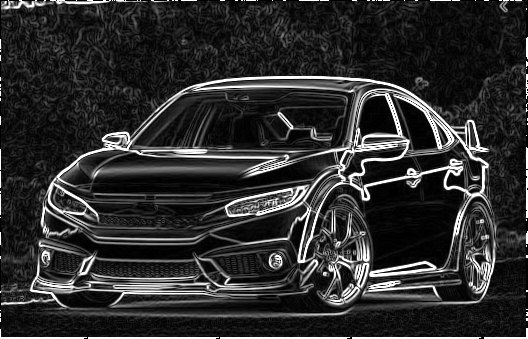

In [ ]:
# 2
def prew_edg_det(a):
    # first of all we need 2D array or we say GRAYSCALE IMAGE
    # WE CAN USE np.mean(a,axis=2) but it does not give correct perception of colour.
    # green seems 10 times more bright than other colour
    # so there is non linear relation b/w bgr to find the gray picture.
    gray=a

    print(gray.shape)
    #image with edge detected
    edged_img_prewitt=np.empty(gray.shape)


    #defining kernel gx and gy
    A=np.array([1 ,1 ,1]).reshape(3,1)
    B=np.array([1,0,-1]).reshape(1,3)
    #defining kernel gx
    gx=np.dot(A,B)
    #defining kernel gy
         # One kernel is simply the other rotated by 90°
    gy=np.dot(B.T,A.T)
    for i in range(0,gray.shape[0]-3):
        for j in range(0,gray.shape[1]-3):
            s1=np.sum(np.multiply(gx,gray[i:i+3,j:j+3]))
            s2=np.sum(np.multiply(gy,gray[i:i+3,j:j+3]))
            n=np.sqrt(s1*s1+s2*s2)
            edged_img_prewitt[i+1,j+1]=n
            # if n>255/3:
            #     edged_img_prewitt[i+1,j+1]= 255
            # else:
            #     edged_img_prewitt[i+1,j+1]= 0


    cv2_imshow( edged_img_prewitt)
prew_edg_det(car)

(339, 528)


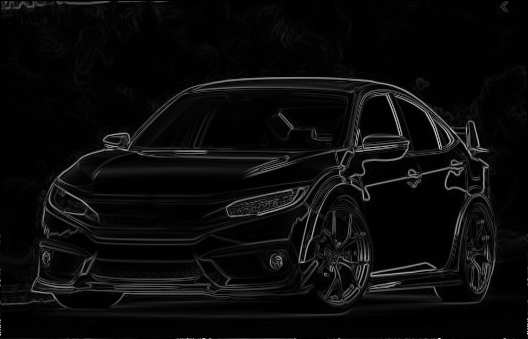

In [ ]:
# 3
def robert_edg_det(a):
    # first of all we need 2D array or we say GRAYSCALE IMAGE
    # WE CAN USE np.mean(a,axis=2) but it does not give correct perception of colour.
    # green seems 10 times more bright than other colour
    # so there is non linear relation b/w bgr to find the gray picture.
    gray=a
    gray=cv2.fastNlMeansDenoising(gray,7,7,15,21)
    print(gray.shape)
    #image with edge detected

    edged_img_robert=np.empty(gray.shape)

    #defining kernel gx and gy

    #defining kernel gx
    gx=np.array([1,0,0,-1]).reshape((2,2))
    #defining kernel gy
         # One kernel is simply the other rotated by 90°
    gy=np.array([0,1,-1,0]).reshape((2,2))
    for i in range(0,gray.shape[0]-2):
        for j in range(0,gray.shape[1]-2):
            s1=np.sum(np.multiply(gx,gray[i:i+2,j:j+2]))
            s2=np.sum(np.multiply(gy,gray[i:i+2,j:j+2]))
            n=np.sqrt(s1*s1+s2*s2)
            edged_img_robert[i+1,j+1]=n
    edged_img_robert=edged_img_robert*255/(edged_img_robert.max())


    cv2_imshow( edged_img_robert)
robert_edg_det(car)

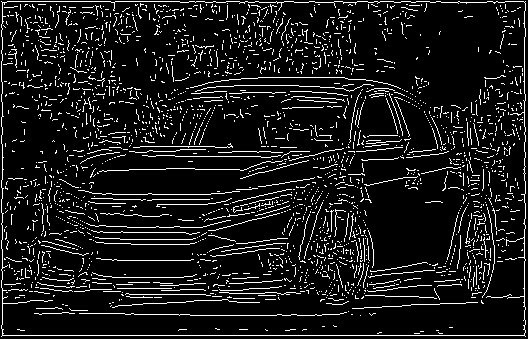

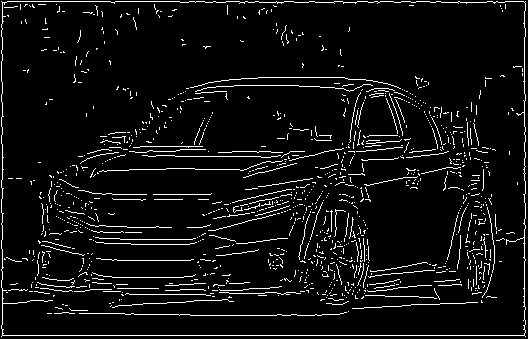

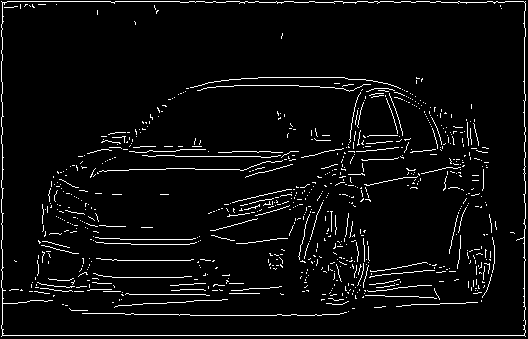

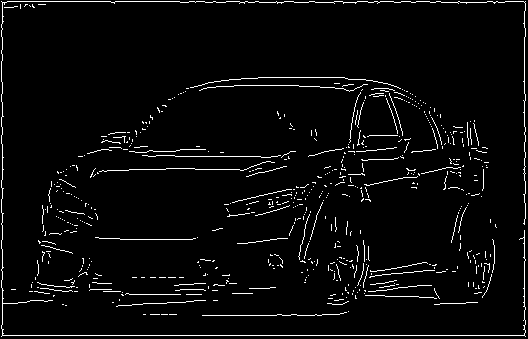

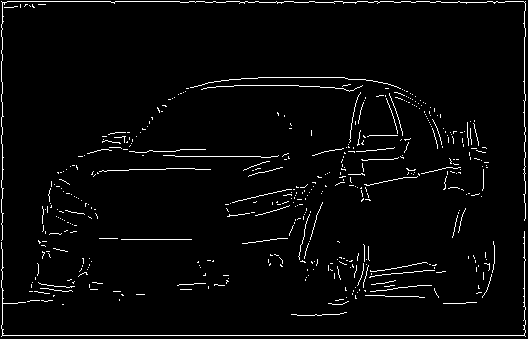

In [ ]:
# 4
def canny_edg_det(a,th):
    gray=a



    #defining kernel gx and gy
    A=np.array([1 ,2 ,1]).reshape(3,1)
    B=np.array([1,0,-1]).reshape(1,3)
    #defining kernel gx
    gx=np.dot(A,B)
    #defining kernel gy
    # One kernel is simply the other rotated by 90°
    gy=np.dot(B.T,A.T)


    # we can make function to cretae gaussian kernel for variable variance
    size=5
    sigma=3
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    gaussian=g/g.sum()
    gaussian_blur_img=np.zeros(gray.shape)
# gaussian blur img
    for i in range(0,gray.shape[0]-size):
        for j in range(0,gray.shape[1]-size):
            v=np.sum(np.multiply(gaussian,gray[i:i+size,j:j+size]))
            gaussian_blur_img[i+size//2,j+size//2]=v


# edged image
    edged_img_canny=np.zeros(gaussian_blur_img.shape)

# direction of edge

    theta = np.zeros(gaussian_blur_img.shape)
# SOBEL
    for i in range(0,gaussian_blur_img.shape[0]-3):
        for j in range(0,gaussian_blur_img.shape[1]-3):
            s1= np.sum(np.multiply(gx,gaussian_blur_img[i:i+3,j:j+3]))
            s2=np.sum(np.multiply(gy,gaussian_blur_img[i:i+3,j:j+3]))

            theta[i+1,j+1]=np.arctan2(s2, s1)
            edged_img_canny[i+1,j+1]= np.sqrt(s1*s1+s2*s2)





# Non-Maximum Suppression
    thinned_edges=np.zeros(gaussian_blur_img.shape)
    for i in range(1,edged_img_canny.shape[0]-1):
        for j in range(1,edged_img_canny.shape[1]-1):

            dir_in_deg= theta[i,j] * 180. / np.pi
            if dir_in_deg<0:
                dir_in_deg+=180


               #angle 0
            if (0 <= dir_in_deg < 22.5) or (157.5 <= dir_in_deg <= 180):
                q = edged_img_canny[i, j+1]
                r = edged_img_canny[i, j-1]
                #angle 45
            elif (22.5 <= dir_in_deg < 67.5):
                q = edged_img_canny[i+1, j-1]
                r = edged_img_canny[i-1, j+1]
                #angle 90
            elif (67.5 <= dir_in_deg < 112.5):
                q = edged_img_canny[i+1, j]
                r = edged_img_canny[i-1, j]
                #angle 135
            elif (112.5 <= dir_in_deg < 157.5):
                q = edged_img_canny[i-1, j-1]
                r = edged_img_canny[i+1, j+1]

            if (edged_img_canny[i,j] >= q) and (edged_img_canny[i,j] >= r):
                thinned_edges[i,j] = edged_img_canny[i,j]
            else:
                thinned_edges[i,j] = 0

# double thresholding for hysteresis thresholding
            h=th
            l=.05
            high=thinned_edges.max()*h
            low=high*l
            weak = np.int32(25)
            strong = np.int32(255)
            if thinned_edges[i,j]<=high and thinned_edges[i,j]>low :
                thinned_edges[i,j]=weak
            elif thinned_edges[i,j]<=low:
                thinned_edges[i,j]=0
            elif thinned_edges[i,j]>high:
                thinned_edges[i,j]=strong



    res=np.zeros(thinned_edges.shape)
    for i in range(1,thinned_edges.shape[0]-1):
        for j in range(1,thinned_edges.shape[1]-1):
            if thinned_edges[i,j]==strong:
                res[i,j]=strong
            if  thinned_edges[i,j]==weak:

                if ((thinned_edges[i+1, j-1] == strong) or (thinned_edges[i+1, j] == strong) or (thinned_edges[i+1, j+1] == strong)
                            or (thinned_edges[i, j-1] == strong) or (thinned_edges[i, j+1] == strong)
                            or (thinned_edges[i-1, j-1] == strong) or (thinned_edges[i-1, j] == strong) or (thinned_edges[i-1, j+1] == strong)):
                    res[i, j] = strong
                else:
                    res[i, j] = 0






    cv2_imshow(res)
for i in np.arange(.1,.6,.1):

    canny_edg_det(car,i)

## threshold value of 0.3 give best result

In [ ]:

def sob_edg_det(a):
    # first of all we need 2D array or we say GRAYSCALE IMAGE
    # WE CAN USE np.mean(a,axis=2) but it does not give correct perception of colour.
    # green seems 10 times more bright than other colour
    # so there is non linear relation b/w bgr to find the gray picture.
    gray=a
    gray=cv2.fastNlMeansDenoising(gray,15,15,15,21)
    print(gray.shape)
    #image with edge detected
    edged_img_sobel=np.empty(gray.shape)
    edged_img_prewitt=np.empty(gray.shape)
    edged_img_robert=np.empty(gray.shape)
    edged_img_canny=np.empty(gray.shape)
    edged_img_diff=np.empty(gray.shape)
    #defining kernel gx and gy
    A=np.array([1 ,2 ,1]).reshape(3,1)
    B=np.array([1,0,-1]).reshape(1,3)
    #defining kernel gx
    gx=np.dot(A,B)
    #defining kernel gy
         # One kernel is simply the other rotated by 90°
    gy=np.dot(B.T,A.T)
    for i in range(0,gray.shape[0]-3):
        for j in range(0,gray.shape[1]-3):
            s1=np.sum(np.multiply(gx,gray[i:i+3,j:j+3]))
            s2=np.sum(np.multiply(gy,gray[i:i+3,j:j+3]))
            n=np.sqrt(s1*s1+s2*s2)
            if n>36:
                edged_img[i+1,j+1]= 255
            else:
                edged_img[i+1,j+1]= 0


    cv2_imshow( edged_img)

(715968,)

In [ ]:

def sob_edg_det(a):
    # first of all we need 2D array or we say GRAYSCALE IMAGE
    # WE CAN USE np.mean(a,axis=2) but it does not give correct perception of colour.
    # green seems 10 times more bright than other colour
    # so there is non linear relation b/w bgr to find the gray picture.
    gray=a
    gray=cv2.fastNlMeansDenoising(gray,15,15,15,21)
    print(gray.shape)
    #image with edge detected
    edged_img_sobel=np.empty(gray.shape)
    edged_img_prewitt=np.empty(gray.shape)
    edged_img_robert=np.empty(gray.shape)
    edged_img_canny=np.empty(gray.shape)
    edged_img_diff=np.empty(gray.shape)
    #defining kernel gx and gy
    A=np.array([1 ,2 ,1]).reshape(3,1)
    B=np.array([1,0,-1]).reshape(1,3)
    #defining kernel gx
    gx=np.dot(A,B)
    #defining kernel gy
         # One kernel is simply the other rotated by 90°
    gy=np.dot(B.T,A.T)
    for i in range(0,gray.shape[0]-3):
        for j in range(0,gray.shape[1]-3):
            s1=np.sum(np.multiply(gx,gray[i:i+3,j:j+3]))
            s2=np.sum(np.multiply(gy,gray[i:i+3,j:j+3]))
            n=np.sqrt(s1*s1+s2*s2)
            if n>36:
                edged_img[i+1,j+1]= 255
            else:
                edged_img[i+1,j+1]= 0


    cv2_imshow( edged_img)

(678, 1056)

In [ ]:
max=0
arr=[]
sum=0
min=255
for i in ed.reshape(678*1056):
    if i>max:
        max=i
    sum=sum+i
    if i<min:
        min=i
print("max",max)
print("mean",sum/len(array))
print("min",min)

max 255.0
mean 35.64341562751408
min 0.0


TypeError: ignored